In [1]:
# bring in my imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from env import host, user, password


import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [2]:
# now we've done everything manually, let's combine and create functions
# create helper function
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the sql database.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
# create my function for my sql query
def get_new_telco_churn_data():
    '''
    This function reads in the telco churn data from the sql database
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
    SELECT *
    FROM payment_types
    JOIN customers ON payment_types.payment_type_id = customers.payment_type_id
    JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
    JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id;
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))

In [4]:
df = get_new_telco_churn_data()

In [5]:
df.sample(5)

,payment_type_id,payment_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type
5699,2,Mailed check,5469-NUJUR,Male,0,No,No,19,Yes,No,...,3,Yes,2,19.95,373.5,No,3,None,3,Two year
41,2,Mailed check,0970-QXPXW,Female,0,No,No,1,Yes,No,...,1,No,2,19.65,19.65,No,3,None,1,Month-to-month
5326,4,Credit card (automatic),9640-ZSLDC,Female,0,Yes,Yes,53,Yes,No,...,2,No,4,60.60,3297,No,1,DSL,2,One year
3804,4,Credit card (automatic),9351-LZYGF,Female,0,Yes,No,42,Yes,Yes,...,1,Yes,4,66.40,2727.8,No,1,DSL,1,Month-to-month
3789,1,Electronic check,9206-GVPEQ,Male,0,Yes,No,13,No,No phone service,...,1,Yes,1,54.45,706.85,Yes,1,DSL,1,Month-to-month


In [6]:
df.shape

(7043, 27)

In [7]:
df = acquire.get_new_telco_churn_data()
churned_df = df[df['churn']=='Yes']

In [8]:
df.sample(5).T

,2303,3173,5121,1493,5499
payment_type_id,1,2,3,3,2
payment_type,Electronic check,Mailed check,Bank transfer (automatic),Bank transfer (automatic),Mailed check
customer_id,8290-YWKHZ,4316-XCSLJ,6152-ONASV,4526-ZJJTM,2300-RQGOI
gender,Female,Male,Female,Female,Female
senior_citizen,1,0,0,1,0
partner,Yes,No,Yes,Yes,No
dependents,No,Yes,No,No,No
tenure,32,17,68,25,38
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,No,Yes,No,No


In [9]:
churned_df.sample().T

,5049
payment_type_id,3
payment_type,Bank transfer (automatic)
customer_id,4785-QRJHC
gender,Male
senior_citizen,1
partner,Yes
dependents,No
tenure,46
phone_service,No
multiple_lines,No phone service


In [10]:
# value counts on my churned data frame

columns = ['payment_type', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
           'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'paperless_billing',
          'monthly_charges', 'total_charges', 'churn', 'internet_service_type', 'contract_type']

for col in columns:
    print(col)
    print(churned_df[col].value_counts())
    print('-------------')

payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
-------------
gender
Female    939
Male      930
Name: gender, dtype: int64
-------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
-------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
-------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
-------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
-------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
-------------
online_security
No                     1461
Yes                     295
No internet service     113
Name: online_security, dtype: int64
-------------
online_backup
No                     1233
Yes                     523
No internet service     113
Name: online_backup,

What are my takeaways?
Right off the bat I can see which columns have an obvious association to churn:
contract_type/contract_type_id
internet_service_type/internet_service_type_id
paperless billing
tech_support
device_protection
online_backup
online security
phone_service
dependents
partner
senior_citizen
payment_type/paymnent_type_id

Things to investigate further:
Is there an association with total charges?
Is there an association with monthly charges?
Is there an association with tenure?


We don't care too much about:
streaming_movies
streaming_tv
multiple_lines
gender

In [11]:
# make a df just for churned customers so we can hone in on a drive
churned_df = df[df['churn']=='Yes']

Combine everything into functions

In [12]:
def prep_telco_data(df):
    '''
    This function prepares and cleans the telco dataframe imported from sql.
    '''
#     df = acquire.get_new_telco_churn_data()

    # get rid of duplicate columns from the sql join
    df = df.loc[:, ~df.columns.duplicated()]

    # this is to adress the blank in total_charges. Here we replace the blank with a nan, and then drop our nulls
    df = df.replace(' ', np.nan)
    df.dropna(inplace=True)
    # change our total_charges from a string to a float
    df.total_charges = df.total_charges.astype('float')
    
    # drop the columns that do not appear to have any association to churn
    df = df.drop(columns=['streaming_movies', 'streaming_tv', 'multiple_lines', 'gender',
                         'contract_type_id', 'internet_service_type_id', 'payment_type_id'])
    
    # rename my tenure column
    df = df.rename(columns={'tenure': 'tenure_in_months'})

    # this change all of my yes and no columns to binary columns
    columns = ['partner', 'dependents', 'phone_service', 'online_security', 'online_backup', 
               'device_protection', 'tech_support', 'paperless_billing', 'churn']

    for cols in columns:
        df[cols] = np.where(df[cols] == 'Yes', 1, 0)

    return df



def create_dummies(df):
    '''
    This function is used to create dummy columns for my non binary columns
    '''
    
    # create dummies for payment_type, internet_service_type, and contract_type
    payment_dummies = pd.get_dummies(df.payment_type, drop_first=True)
    internet_dummies = pd.get_dummies(df.internet_service_type, drop_first=False)
    contract_dummies = pd.get_dummies(df.contract_type, drop_first=True)
    
    # now we concatenate our dummy dataframes with the original
    df = pd.concat([df, payment_dummies, internet_dummies, contract_dummies], axis=1)
    
    # now I am dropping all my original string columns that I made dummies with and dropping 
    #the type_id columns since they are duplicates of the string column
    df = df.drop(columns=['None', 'payment_type', 'contract_type', 'internet_service_type'])
    
    return df


def telco_split(df):
    '''
    This function takes in a dataframe and splits it into train, test, and validate dataframes for my model
    '''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [13]:
df = prepare.prep_telco_data(df)

In [14]:
df.sample().T

,4660
payment_type,Electronic check
customer_id,7694-VLBWQ
senior_citizen,0
partner,1
dependents,0
tenure_in_months,67
phone_service,1
online_security,0
online_backup,1
device_protection,1


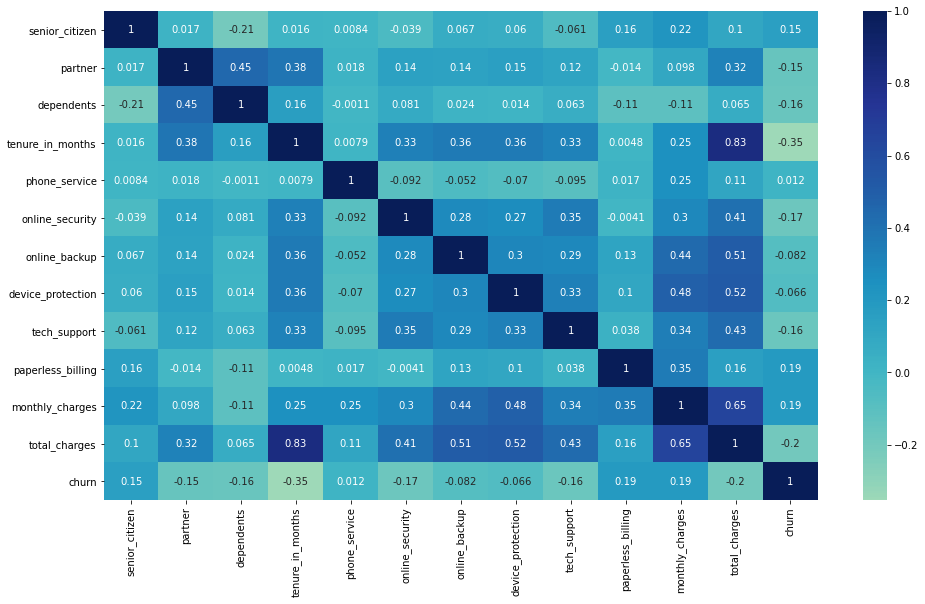

In [15]:
plt.figure(figsize=(16, 9))
sns.heatmap(((df.corr())), cmap='YlGnBu', center=0, annot=True)

plt.title('')
plt.show()

In [16]:
correl = df.corr()
correl.T

,senior_citizen,partner,dependents,tenure_in_months,phone_service,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.156258,0.219874,0.102411,0.150541
partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,-0.013957,0.097825,0.319072,-0.149982
dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.110131,-0.112343,0.064653,-0.163128
tenure_in_months,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.004823,0.246862,0.825880,-0.354049
phone_service,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,0.016696,0.248033,0.113008,0.011691
online_security,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,-0.004051,0.296447,0.412619,-0.171270
online_backup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.127056,0.441529,0.510100,-0.082307
device_protection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.104079,0.482607,0.522881,-0.066193
tech_support,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.037536,0.338301,0.432868,-0.164716
paperless_billing,0.156258,-0.013957,-0.110131,0.004823,0.016696,-0.004051,0.127056,0.104079,0.037536,1.000000,0.351930,0.157830,0.191454


Text(0.5, 1.0, 'Feautures  Correlating with Churn')

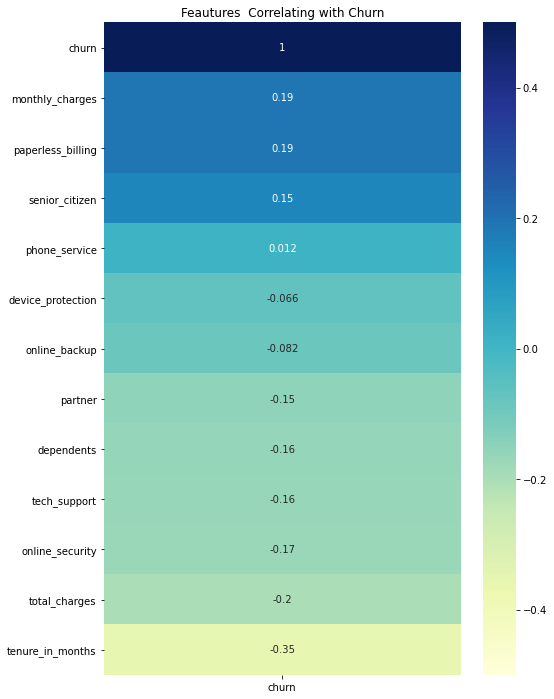

In [17]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='YlGnBu', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures  Correlating with Churn')

In [18]:
churned_df = df[df['churn']==1]
churned_df.sample(3).T

,2488,641,1512
payment_type,Electronic check,Mailed check,Electronic check
customer_id,9282-IZGQK,0519-XUZJU,4587-NUKOX
senior_citizen,0,0,0
partner,0,0,0
dependents,0,0,0
tenure_in_months,1,1,3
phone_service,1,1,1
online_security,0,0,1
online_backup,0,0,1
device_protection,0,0,0
